# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We chose Rotterdam and Lond...
1,✅ Trip Verified | The entire booking and ticke...
2,Not Verified | British Airways cancelled my ...
3,Not Verified | I wanted to write this review s...
4,✅ Trip Verified | Check in fast and friendly....


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## DATA CLEANING

In [5]:
# Separate content of the reviews by creating 2 new columns (status & info)

df[['review_status','review_info']] = df['reviews'].str.split("|", n=1, expand=True)

# Drop the original reviews column'
df.drop(columns=['reviews'], inplace=True)

df.head()

,review_status,review_info
0,✅ Trip Verified,We chose Rotterdam and London City airport b...
1,✅ Trip Verified,The entire booking and ticketing experience h...
2,Not Verified,British Airways cancelled my flight less th...
3,Not Verified,I wanted to write this review so I could give...
4,✅ Trip Verified,Check in fast and friendly. Security a breez...


In [6]:
# check the values in review_status to ensure consistency

categories = df['review_status'].unique()
print("Categories:", categories)

Categories: ['✅ Trip Verified ' 'Not Verified ' 'cNot Verified ' '❎ Not Verified ']


In [7]:
# standardize status to two categories
df['review_status'] = df['review_status'].replace(['❎ Not Verified ','cNot Verified ','Not Verified '], 'Not Verified') 

In [8]:
df['review_status'] = df['review_status'].replace(['✅ Trip Verified ','Trip Verified '], 'Trip Verified')

In [9]:
categories_new = df['review_status'].unique()
categories_new

array(['Trip Verified', 'Not Verified'], dtype=object)

## Data cleanup

In [10]:
# Import libraries for cleanup

import nltk
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import re

from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import urllib

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# set plot style
sns.set_theme()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ruthwangeshi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruthwangeshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ruthwangeshi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## removing the noise from the data



In [11]:
# changing text to lowercase

df['review_info'] = df['review_info'].str.lower()
df['review_info'].head()

0      we chose rotterdam and london city airport b...
1     the entire booking and ticketing experience h...
2       british airways cancelled my flight less th...
3     i wanted to write this review so i could give...
4      check in fast and friendly. security a breez...
Name: review_info, dtype: object

In [12]:
# removing punctuation

def remove_punctuation(review_info):
    return ''.join([l for l in review_info if l not in string.punctuation])

df['review_info'] = df['review_info'].apply(remove_punctuation)
df['review_info']

0        we chose rotterdam and london city airport b...
1       the entire booking and ticketing experience h...
2         british airways cancelled my flight less th...
3       i wanted to write this review so i could give...
4        check in fast and friendly security a breeze...
                             ...                        
995      london to seattle my seat was on the upper d...
996      london to gibraltar check in at t3 was fine ...
997      london to boston ba replaced a380 with a ver...
998      london to doha similar to our outbound fligh...
999      london heathrow to houston despite sitting a...
Name: review_info, Length: 1000, dtype: object

In [13]:
# tokenizing our data & create new column (tokens)

tokeniser = TreebankWordTokenizer()

df['tokens'] = df['review_info'].apply(tokeniser.tokenize)

print(df['tokens'].iloc[0])

['we', 'chose', 'rotterdam', 'and', 'london', 'city', 'airport', 'because', 'of', 'convenience', 'both', 'small', 'and', 'having', 'a', 'hotel', 'in', 'the', 'docklands', 'meant', 'a', 'short', 'distance', 'from', 'city', 'airport', 'three', 'hours', 'before', 'our', 'departure', 'our', 'flight', 'was', 'canceled', 'however', 'disappointing', 'but', 'we', 'made', 'a', 'swift', 'move', 'to', 'amsterdam', 'schiphol', 'airport', 'but', 'unfortunately', 'we', 'were', 'offered', 'a', 'flight', 'to', 'heathrow', 'which', 'meant', 'almost', '15', 'hours', 'by', 'tube', 'to', 'our', 'hotel', 'flight', 'back', 'operated', 'out', 'of', 'lcy', 'to', 'rtm', 'but', 'had', 'a', '30', 'mins', 'delay', 'so', 'in', 'terms', 'of', 'punctuality', 'ba', 'is', 'not', 'very', 'reliant', 'the', 'flights', 'were', 'okay', 'with', 'a', 'snack', 'and', 'a', 'drink', 'the', 'e190', 'being', 'far', 'more', 'comfortable', 'with', '22', 'seating', 'and', 'more', 'legroom', 'than', 'the', 'a319', 'our', 'extra', 'ex

In [14]:
# we lemmatize our data to reduce words to their base form & create new column (lemma)

lemmatizer = WordNetLemmatizer()

def review_info_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

df['lemma'] = df['tokens'].apply(review_info_lemma, args=(lemmatizer, ))

# check results
for i, t in enumerate(df.iloc[0]['tokens']):
    print ('{:20s} --> {:10s}'.format (t, df.iloc[0]['lemma'][i]))

we                   --> we        
chose                --> chose     
rotterdam            --> rotterdam 
and                  --> and       
london               --> london    
city                 --> city      
airport              --> airport   
because              --> because   
of                   --> of        
convenience          --> convenience
both                 --> both      
small                --> small     
and                  --> and       
having               --> having    
a                    --> a         
hotel                --> hotel     
in                   --> in        
the                  --> the       
docklands            --> docklands 
meant                --> meant     
a                    --> a         
short                --> short     
distance             --> distance  
from                 --> from      
city                 --> city      
airport              --> airport   
three                --> three     
hours                --> ho

In [15]:
# we remove stopwords from our text & create new column (stem)

def remove_stop_words(lemma):
    return [t for t in lemma if t not in stopwords.words ('english')]

df['stem'] = df['lemma'].apply(remove_stop_words)
df['stem'].head()

0    [chose, rotterdam, london, city, airport, conv...
1    [entire, booking, ticketing, experience, ha, s...
2    [british, airway, cancelled, flight, le, 24, h...
3    [wanted, write, review, could, give, huge, tha...
4    [check, fast, friendly, security, breeze, loun...
Name: stem, dtype: object

In [16]:
df.head()

,review_status,review_info,tokens,lemma,stem
0,Trip Verified,we chose rotterdam and london city airport b...,"[we, chose, rotterdam, and, london, city, airp...","[we, chose, rotterdam, and, london, city, airp...","[chose, rotterdam, london, city, airport, conv..."
1,Trip Verified,the entire booking and ticketing experience h...,"[the, entire, booking, and, ticketing, experie...","[the, entire, booking, and, ticketing, experie...","[entire, booking, ticketing, experience, ha, s..."
2,Not Verified,british airways cancelled my flight less th...,"[british, airways, cancelled, my, flight, less...","[british, airway, cancelled, my, flight, le, t...","[british, airway, cancelled, flight, le, 24, h..."
3,Not Verified,i wanted to write this review so i could give...,"[i, wanted, to, write, this, review, so, i, co...","[i, wanted, to, write, this, review, so, i, co...","[wanted, write, review, could, give, huge, tha..."
4,Trip Verified,check in fast and friendly security a breeze...,"[check, in, fast, and, friendly, security, a, ...","[check, in, fast, and, friendly, security, a, ...","[check, fast, friendly, security, breeze, loun..."


In [17]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [18]:
# we calculate polarity to gather sentiments & create new colum (polarity)

from textblob import TextBlob

def calculate_polarity(stem):
    # combine list of strings into single string
    text = ' '.join(stem)
    
    # create textblob object
    blob = TextBlob(text)

    # calculate polarity
    polarity = blob.sentiment.polarity
    return polarity

df['polarity'] = df['stem'].apply(calculate_polarity)
df['polarity'].head()


0    0.029167
1   -0.095417
2   -0.229293
3    0.131250
4    0.349242
Name: polarity, dtype: float64

In [19]:
# we convert the polarity values into sujective labels

def pol_sentiments(num):
    if num < 0:
        return 'Negative'
    elif num > 0:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiments'] = df['polarity'].apply(pol_sentiments)
df['sentiments'].head()

0    Positive
1    Negative
2    Negative
3    Positive
4    Positive
Name: sentiments, dtype: object

## Visualising our results

review_status
Trip Verified    760
Not Verified     240
Name: count, dtype: int64


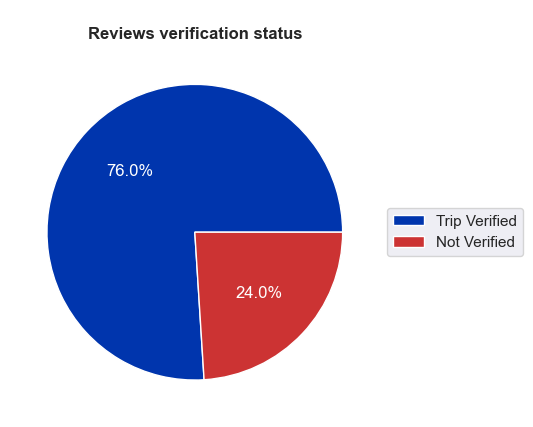

In [20]:
# we analyse how many reviews are verified versus unverified

import matplotlib.pyplot as plt

reviews_count = df['review_status'].value_counts()
print(reviews_count)

colors = ['#0035AD', '#CC3333']
plt.pie(reviews_count, labels = None, colors = colors, autopct='%1.1f%%', textprops={'color':'white'})
plt.title("\nReviews verification status",fontweight='bold')
plt.legend(labels = reviews_count.index,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

sentiments
Positive    639
Negative    345
Neutral      16
Name: count, dtype: int64


review_status  sentiments
Not Verified   Positive      151
               Negative       85
               Neutral         4
Trip Verified  Positive      488
               Negative      260
               Neutral        12
Name: count, dtype: int64


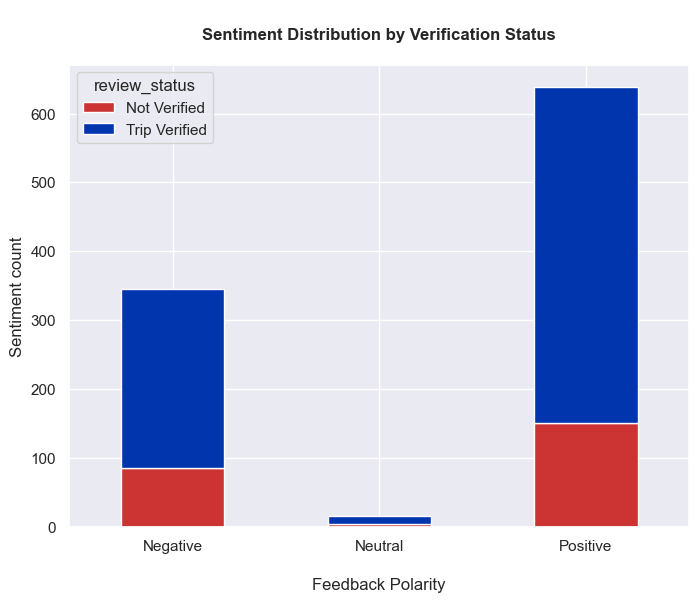

In [21]:
# we analyse customer sentiments

print(df['sentiments'].value_counts())
print("\n")
print(df.groupby('review_status')['sentiments'].value_counts())

counts = df.groupby(['sentiments','review_status']).size().unstack()

colors = ['#CC3333','#0035AD']
counts.plot(kind = 'bar', stacked = True, figsize = (8,6), color=colors)
plt.xticks(rotation=0)
plt.xlabel('\nFeedback Polarity')
plt.ylabel('Sentiment count')
plt.title('\nSentiment Distribution by Verification Status\n',fontweight='bold')
plt.show()

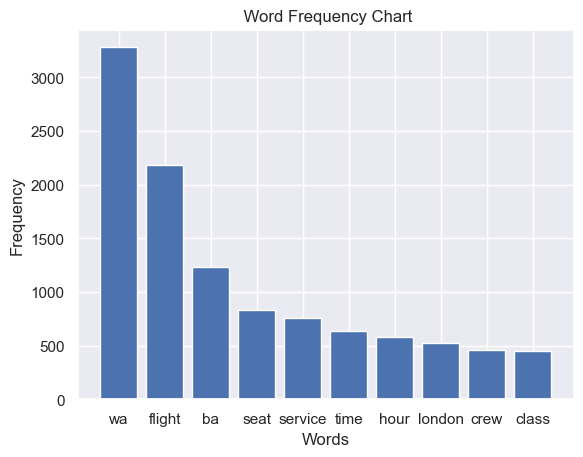

In [22]:
# we find and display the most used words in the reviews
# we use the stem column since it has been stripped of stopwords and are in their base form(lemmatized)

from collections import Counter

stem_text_combo = ' '.join(df['stem'].apply(lambda x: ' '.join(x)))
stem_text_words = stem_text_combo.split()
word_frequency = Counter(stem_text_words)

word_frequency_df = pd.DataFrame(list(word_frequency.items()), columns=['Word', 'Frequency'])
word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending = False)

plt.bar(word_frequency_df['Word'][:10], word_frequency_df['Frequency'][:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(" Word Frequency Chart")
plt.show()

In [23]:
# we check & filter out words that aren't grammatically correct

#stem word 'wa'
stem_to_search = 'wa'
stem_word_pairs = []

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    if stem_to_search in row['stem']:
        for token in row['tokens']:
            if stem_to_search in token:
                stem_word_pairs.append((stem_to_search, token))
                break

# Convert the list of tuples to a DataFrame & display
stem_word_df = pd.DataFrame(stem_word_pairs, columns=['Stem', 'Original'])
print("Stem word 'wa':\n", stem_word_df)

#stem word 'ba'
stem_to_search = 'ba'
stem_word_pairs = []

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    if stem_to_search in row['stem']:
        for token in row['tokens']:
            if stem_to_search in token:
                stem_word_pairs.append((stem_to_search, token))
                break

# Convert the list of tuples to a DataFrame & display
stem_word_df = pd.DataFrame(stem_word_pairs, columns=['Stem', 'Original'])
print("\nStem word 'ba':\n", stem_word_df)


Stem word 'wa':
     Stem Original
0     wa      was
1     wa      was
2     wa  airways
3     wa   wanted
4     wa      was
..   ...      ...
802   wa  airways
803   wa      was
804   wa      was
805   wa      was
806   wa      was

[807 rows x 2 columns]

Stem word 'ba':
     Stem Original
0     ba     back
1     ba       ba
2     ba    based
3     ba       ba
4     ba     back
..   ...      ...
550   ba       ba
551   ba       ba
552   ba       ba
553   ba       ba
554   ba     back

[555 rows x 2 columns]


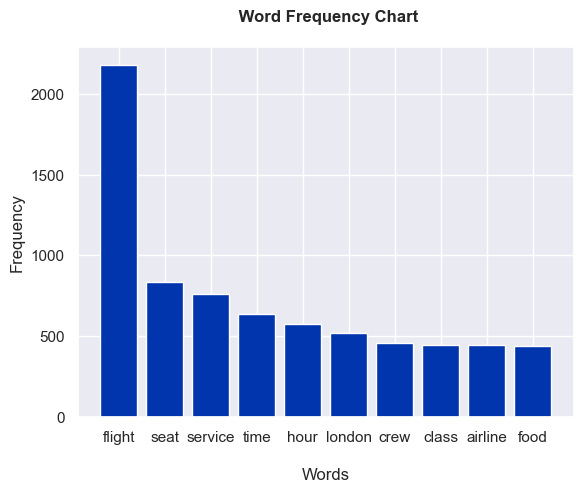

In [24]:
# we remove the words 'ba' and 'wa' from our chart as they aren't significant

colors = ['#0035AD']
plt.bar(word_frequency_df['Word'].iloc[[1,3,4,5,6,7,8,9,10,11]], 
        word_frequency_df['Frequency'].iloc[[1,3,4,5,6,7,8,9,10,11]],
        color=colors)
plt.xlabel("\nWords")
plt.ylabel("Frequency")
plt.title(" Word Frequency Chart\n",fontweight='bold')
plt.show()

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


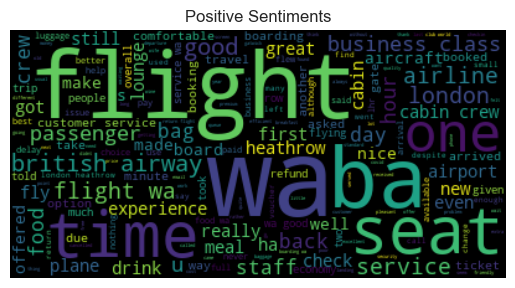

In [26]:
# generate & display a wordcloud for positive sentiments

from wordcloud import WordCloud

pos_df = df[df['sentiments']== 'Positive']

pos_text = " ".join(pos_df['stem'].apply(lambda x: " ".join(x)))

wordcloud_pos = WordCloud().generate(pos_text)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiments")
plt.show()


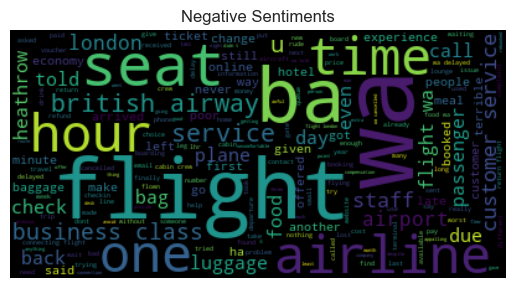

In [27]:
# generate & display a wordcloud for negative sentiments

neg_df = df[df['sentiments']=='Negative']

neg_text = " ".join(neg_df['stem'].apply(lambda x: " ".join(x)))

wordcloud_neg = WordCloud().generate(neg_text)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiments")
plt.show()